In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y),np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y),np.array(t)))


0.09750000000000003
0.5975


In [5]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t* np.log(y+delta))

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))


0.510825457099338
2.302584092994546


In [7]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [8]:
print(np.array([]).shape)

(0,)


In [9]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h


In [10]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [11]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

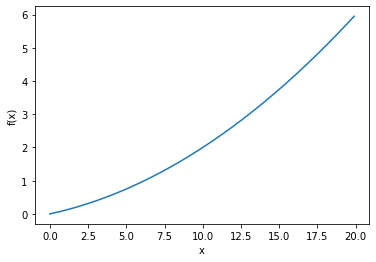

In [12]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [13]:
print(numerical_diff(function_1, 5))

0.1999999999990898


In [14]:
print(numerical_diff(function_1, 10))

0.2999999999986347


In [15]:
def function_2(x):
    return x[0] **2 + x[1] ** 2

In [16]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

In [17]:
print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [18]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


In [19]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [20]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [21]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [22]:
def funxtion_2(x):
    return x[0] **2 + x[1] ** 2

In [23]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [24]:
import sys, os
sys.path.append(os.curdir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
        


ModuleNotFoundError: No module named 'common'

In [34]:
net = simpleNet()
print(net.W)

[[ 0.40253824 -1.43882714  0.66274156]
 [ 0.74581934 -0.79879839  1.59208693]]


In [39]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0,0,1])
print(net.loss(x, t))


[ 0.91276035 -1.58221484  1.83052317]
2
0.3593250042709572


In [42]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.16730886  0.01380273 -0.18111159]
 [ 0.25096328  0.02070409 -0.27166738]]


In [2]:
import sys, os
sys.path.append(os.curdir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    def gradient(self, x, t):
            W1, W2 = self.params['W1'], self.params['W2']
            b1, b2 = self.params['b1'], self.params['b2']
            grads = {}
            
            batch_num = x.shape[0]
            
            # forward
            a1 = np.dot(x, W1) + b1
            z1 = sigmoid(a1)
            a2 = np.dot(z1, W2) + b2
            y = softmax(a2)
            
            # backward
            dy = (y - t) / batch_num
            grads['W2'] = np.dot(z1.T, dy)
            grads['b2'] = np.sum(dy, axis=0)
            
            da1 = np.dot(dy, W2.T)
            dz1 = sigmoid_grad(a1) * da1
            grads['W1'] = np.dot(x.T, dz1)
            grads['b1'] = np.sum(dz1, axis=0)

            return grads
        


In [3]:
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train) , (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print('start')

train_lost_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_lost_list.append(loss)

print('end')


start
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
end
